# library imports

In [360]:
import pandas as pd 
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot as plt

In [361]:
ratings = {'Rating': [], 'Date': [], 'Resort': []}
for file in os.listdir('comments/'):
    filepath = os.path.join('comments/', file)
    df = pd.read_csv(filepath)
    ratings['Rating'] = ratings['Rating']+df['Rating'].values.tolist()
    ratings['Date'] = ratings['Date']+df['Date'].values.tolist()
    ratings['Resort'] = ratings['Resort']+[file.split('.')[0] for i in range(df.shape[0])]

In [362]:
ratings = pd.DataFrame(ratings)
ratings.head()

,Rating,Date,Resort
0,4,2017-04-22 03:53:09,Charlotte
1,5,2017-06-11 03:54:51,Charlotte
2,5,2017-10-18 07:23:51,Charlotte
3,4,2017-12-04 09:57:32,Charlotte
4,4,2017-12-08 06:26:21,Charlotte


In [363]:
ratings['Resort']=ratings['Resort'].map(lambda x: 'Charlotte Pass' if x=='Charlotte' else x)

In [364]:
def compute_custom_week(date):
    date = datetime.strptime(date,"%Y-%m-%d %H:%M:%S")
    week1_start = pd.to_datetime(f"{date.year}-06-09")
    days_diff = (date - week1_start).days

    week_num = (days_diff // 7) + 1

    return 'week'+str(week_num) if week_num >= 1 and week_num<=15 else None  

In [365]:
compute_custom_week(ratings['Date'].values[0])

In [366]:
ratings['Week'] = ratings['Date'].apply(lambda x:compute_custom_week(x))

In [367]:
ratings = ratings[~ratings['Week'].isnull()]

In [368]:
ratings

,Rating,Date,Resort,Week
1,5,2017-06-11 03:54:51,Charlotte Pass,week1
19,1,2018-08-19 05:10:19,Charlotte Pass,week11
20,1,2018-08-26 00:55:01,Charlotte Pass,week12
35,5,2019-06-09 11:49:33,Charlotte Pass,week1
36,5,2019-06-20 11:50:03,Charlotte Pass,week2
...,...,...,...,...
9559,2,2025-08-27 11:34:04,Thredbo,week12
9560,4,2025-08-27 12:16:21,Thredbo,week12
9561,5,2025-08-29 04:46:27,Thredbo,week12
9562,5,2025-08-29 12:18:15,Thredbo,week12


In [369]:
ratings['Year'] = ratings['Date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").year)

In [370]:
ratings = ratings.groupby(['Resort','Week', 'Year'])['Rating'].mean()

In [371]:
ratings.reset_index().to_csv('ratings.csv')

In [372]:
ratings = pd.DataFrame(ratings.reset_index())
ratings['week_num'] = ratings['Week'].apply(lambda x: int(x[-1]))
ratings = ratings.sort_values(['Resort', 'week_num', 'Year'])

In [373]:
ratings.isnull().sum()

Resort      0
Week        0
Year        0
Rating      0
week_num    0
dtype: int64

In [374]:
ratings

,Resort,Week,Year,Rating,week_num
3,Charlotte Pass,week10,2020,5.000000,0
4,Charlotte Pass,week10,2021,5.000000,0
5,Charlotte Pass,week10,2022,3.500000,0
6,Charlotte Pass,week10,2025,5.000000,0
0,Charlotte Pass,week1,2017,5.000000,1
...,...,...,...,...,...
451,Thredbo,week9,2021,3.800000,9
452,Thredbo,week9,2022,4.692308,9
453,Thredbo,week9,2023,4.625000,9
454,Thredbo,week9,2024,4.600000,9


In [375]:
ratings.dtypes

Resort       object
Week         object
Year          int64
Rating      float64
week_num      int64
dtype: object

In [376]:
ratings = ratings[ratings['Year']>2013]

In [377]:
ratings.head()

,Resort,Week,Year,Rating,week_num
3,Charlotte Pass,week10,2020,5.0,0
4,Charlotte Pass,week10,2021,5.0,0
5,Charlotte Pass,week10,2022,3.5,0
6,Charlotte Pass,week10,2025,5.0,0
0,Charlotte Pass,week1,2017,5.0,1


In [378]:
ratings['Date'] = pd.to_datetime(ratings['Year'].astype(str) + '-06-09') + pd.to_timedelta((ratings['week_num']) * 7, unit='D')

C:\Users\Huawei\AppData\Local\Temp\ipykernel_74076\2824894695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Date'] = pd.to_datetime(ratings['Year'].astype(str) + '-06-09') + pd.to_timedelta((ratings['week_num']) * 7, unit='D')


In [379]:
ratings.tail()

,Resort,Week,Year,Rating,week_num,Date
451,Thredbo,week9,2021,3.800000,9,2021-08-11
452,Thredbo,week9,2022,4.692308,9,2022-08-11
453,Thredbo,week9,2023,4.625000,9,2023-08-11
454,Thredbo,week9,2024,4.600000,9,2024-08-11
455,Thredbo,week9,2025,4.000000,9,2025-08-11


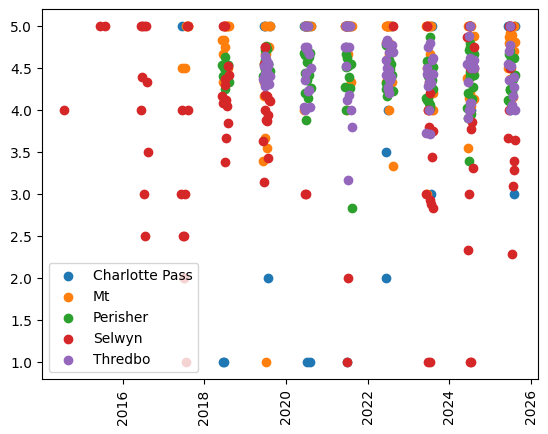

In [380]:
fig, ax= plt.subplots(1,1)
for x in ratings.Resort.unique():
    data = ratings.loc[ratings['Resort']==x]
    data = data.sort_values('Date')
    data = data.sort_values(['week_num', 'Year'])
    ax.scatter(data['Date'], data['Rating'], label = x)
plt.xticks(rotation=90)
plt.legend()

In [381]:
ratings[ratings['Resort'] == 'Mount Buller'].Date.min()

NaT

In [382]:
visit_aus = pd.read_excel('2025 Allianz Datathon Dataset.xlsx', sheet_name='Visitation Data')

In [383]:
visit_aus

,Year,Week,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
0,2014,1,555,60,3483,2790,8296,1041,5535,7370,408
1,2014,2,804,42,1253,1425,1987,383,2090,2751,151
2,2014,3,993,30,2992,2101,2413,597,3216,4255,230
3,2014,4,2976,165,9680,9544,18831,2877,15497,20265,1134
4,2014,5,11112,645,29628,26211,49217,8588,46546,61339,3403
...,...,...,...,...,...,...,...,...,...,...,...
160,2024,11,5977,1416,24260,38541,43387,6859,37608,49136,2667
161,2024,12,3597,701,19289,42101,36668,5969,33208,43382,2392
162,2024,13,1500,213,14487,25252,15415,3351,18120,23908,1323
163,2024,14,0,0,2700,17137,0,1177,6270,8244,454


In [385]:
visit_aus = visit_aus.melt(value_vars=['Mt. Baw Baw', 'Mt. Stirling', 'Mt. Hotham', 'Falls Creek', 	'Mt. Buller',  'Selwyn',
	                       'Thredbo', 'Perisher',  'Charlotte Pass'], id_vars=['Year', 'Week'])

,Year,Week,variable,value
0,2014,1,Mt. Baw Baw,555
1,2014,2,Mt. Baw Baw,804
2,2014,3,Mt. Baw Baw,993
3,2014,4,Mt. Baw Baw,2976
4,2014,5,Mt. Baw Baw,11112
...,...,...,...,...
1480,2024,11,Charlotte Pass,2667
1481,2024,12,Charlotte Pass,2392
1482,2024,13,Charlotte Pass,1323
1483,2024,14,Charlotte Pass,454
